# Analysing Spotify Dataset


This dataset consists of  ca. 600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). The data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) shows different characteristics of songs such as the beats per minute, amount of spoken words, loudness, and energy of every song. 


## Objectives:<br>
This notebook has a goal of performing a descriptive analysis and visualizations of the Spotify data set and cover the following topics:
* Decide which artists are the most popular
* Discuss the criteria for the popularity
* See what year has the highest popularity and why
* Analyse what genre people like the most
* Demonstrate the role of outliers

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectives:" data-toc-modified-id="Objectives:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectives:<br></a></span></li><li><span><a href="#Import-the-libraries" data-toc-modified-id="Import-the-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import the libraries</a></span></li><li><span><a href="#Read-the-data-set-from-a-CSV-file" data-toc-modified-id="Read-the-data-set-from-a-CSV-file-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read the data set from a CSV file</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the data</a></span><ul class="toc-item"><li><span><a href="#First-glipse-on-the-data" data-toc-modified-id="First-glipse-on-the-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>First glipse on the data<br></a></span></li><li><span><a href="#Types" data-toc-modified-id="Types-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Types</a></span></li><li><span><a href="#Missing-data" data-toc-modified-id="Missing-data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Missing data</a></span></li></ul></li><li><span><a href="#Descriptive-statistic" data-toc-modified-id="Descriptive-statistic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistic<br></a></span></li><li><span><a href="#Let's-find-out-the-most-popular-artists" data-toc-modified-id="Let's-find-out-the-most-popular-artists-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Let's find out the most popular artists</a></span><ul class="toc-item"><li><span><a href="#Frequency-of-appearance" data-toc-modified-id="Frequency-of-appearance-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Frequency of appearance</a></span></li><li><span><a href="#Multiple-occurence" data-toc-modified-id="Multiple-occurence-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Multiple occurence</a></span></li><li><span><a href="#Top-5-occurences" data-toc-modified-id="Top-5-occurences-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Top 5 occurences</a></span></li><li><span><a href="#Songs-that-appeared-twice" data-toc-modified-id="Songs-that-appeared-twice-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Songs that appeared twice</a></span></li><li><span><a href="#Katy-Perry" data-toc-modified-id="Katy-Perry-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Katy Perry</a></span></li><li><span><a href="#Popularity-vs.-occurence" data-toc-modified-id="Popularity-vs.-occurence-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Popularity vs. occurence</a></span></li></ul></li><li><span><a href="#Most-popular-year" data-toc-modified-id="Most-popular-year-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Most popular year</a></span><ul class="toc-item"><li><span><a href="#Talk-about-outliers" data-toc-modified-id="Talk-about-outliers-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Talk about outliers</a></span><ul class="toc-item"><li><span><a href="#Weird-ratings" data-toc-modified-id="Weird-ratings-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Weird ratings</a></span></li><li><span><a href="#P!nk-and-the-role-of-zeros" data-toc-modified-id="P!nk-and-the-role-of-zeros-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>P!nk and the role of zeros</a></span></li></ul></li><li><span><a href="#Over-80" data-toc-modified-id="Over-80-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Over 80</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Trends" data-toc-modified-id="Trends-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Trends</a></span></li><li><span><a href="#Genres" data-toc-modified-id="Genres-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Genres</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Import the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

import warnings

warnings.filterwarnings('ignore')

## Read the data set from a CSV file

In [3]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/VladimirNechaev1988/Spotify_Music/main/Spotify.csv',
    encoding='ISO-8859-1')
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Explore the data

Check the basic information about our data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


We can conclude that the data consists of 603 rows and 15 columns and is cinsistent

### First glipse on the data<br>

Let's take a look at our data set and explore what each column means</br>

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

### Types

Let's check our data types to make sure the data are consistent

In [9]:
df.dtypes

Unnamed: 0     int64
title         object
artist        object
top genre     object
year           int64
bpm            int64
nrgy           int64
dnce           int64
dB             int64
live           int64
val            int64
dur            int64
acous          int64
spch           int64
pop            int64
dtype: object

All data types seem to be correct. <br>
We do have an unwanted first column with the ID numbers which is irrelevant so we can drop it

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### Missing data

Let's check if there are any missing values

In [6]:
df.isna().any()

title        False
artist       False
top genre    False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
dtype: bool

In [7]:
df.isna().sum()

title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

We are lucky, the data set is clean!

## Descriptive statistic<br>

We will discover:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>

In [8]:
df.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


We might wanna include the categorical variables as well to see how many unique values there are and which one is the most frequent

In [9]:
df.describe(include=['object'])

,title,artist,top genre
count,603,603,603
unique,584,184,50
top,A Little Party Never Killed Nobody (All We Got),Katy Perry,dance pop
freq,2,17,327


We can see that out of 603 records, there are 184 unique artists, 584 songs in 50 genres, with Katy Perry appearing the most often<br> Let's go ahead and see, what artists are as well in the list of leaders by appearance

## Let's find out the most popular artists

The artist popularity can be defined either by the consistent occurence in the chart, or by the popularity rating <br> Let's explore the difference

First, let's subset the arstist column and calculate how often they appeared

In [10]:
artist = df['artist'].value_counts().to_frame().reset_index(level=0).rename(
    columns={
        'artist': 'count',
        'index': 'artist'
    })

artist

,artist,count
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
...,...,...
179,Iggy Azalea,1
180,5 Seconds of Summer,1
181,Michael Jackson,1
182,Disclosure,1


Yep, that's right, Katy Pery is on the top.


### Frequency of appearance

Now let's choose the artists which appear in the list 10 or more times

In [11]:
artist_10 = artist[artist['count'] >= 10]
artist_10.shape

(13, 2)

We have 13 artist in this group!<br>
Let's plot them

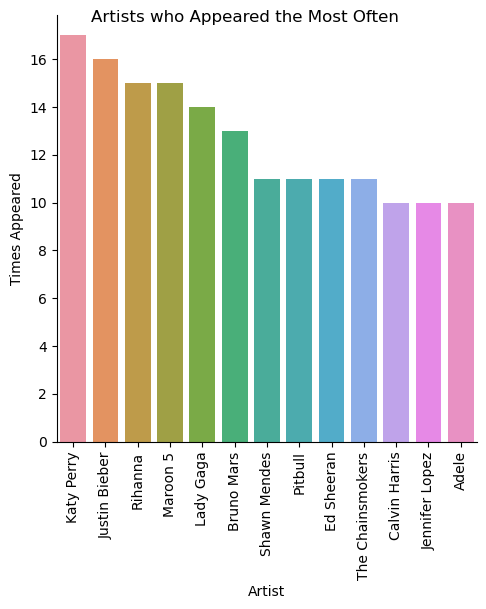

In [12]:
g = sns.catplot(x='artist', y='count', data=artist_10, kind='bar')
g.fig.suptitle("Artists who Appeared the Most Often")
g.set(xlabel='Artist', ylabel='Times Appeared')
plt.xticks(rotation=90)
plt.show()

That's right, Katy Perry is on the top, followed by Justin Bieber and Rihanna. Adele closes the top 10

### Multiple occurence

We can as well check how many artists appeared once, twice, three times, etc

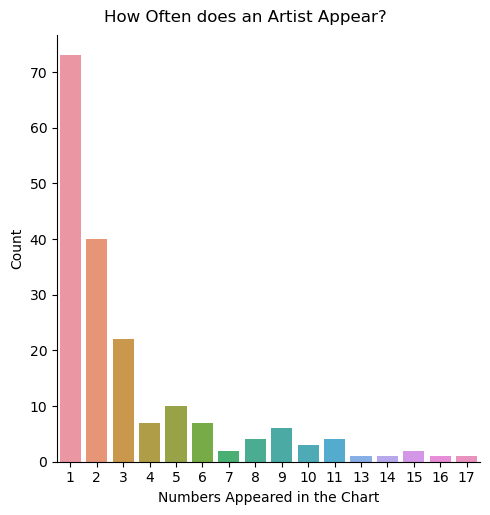

In [13]:
g = sns.catplot(x='count', data=artist, kind='count')
g.fig.suptitle("How Often does an Artist Appear?", y=1.02)
g.set(xlabel='Numbers Appeared in the Chart', ylabel='Count')
plt.show()

As we can see, most artists appeared only once, yet some appered 13, 14, 16 and 17 times!

In [14]:
artist[artist['count'] == 1].shape

(73, 2)

To be more precise, there are 73 artists out of 184 who appered only once

### Top 5 occurences

And who are those who appeared the most often?

In [15]:
most_occurence = artist['count'][0:5].unique().tolist()

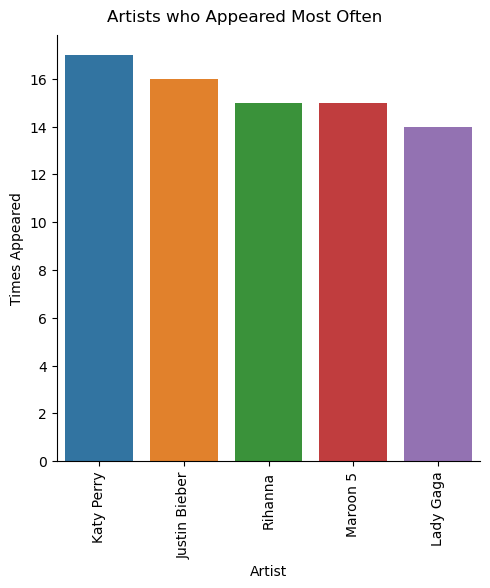

In [16]:
leaders = artist[artist['count'].isin(most_occurence)]
g = sns.catplot(x='artist', y='count', data=leaders, kind='bar')
g.fig.suptitle("Artists who Appeared Most Often", y=1.02)
g.set(xlabel='Artist', ylabel='Times Appeared')
plt.xticks(rotation=90)
plt.show()

### Songs that appeared twice

Let's find out which songs ended up twice in our rating (two years in a row)

First, lets count the tiles

In [17]:
title = df['title'].value_counts().to_frame().reset_index(level=0).rename(
    columns={
        'title': 'count',
        'index': 'title'
    })
title

,title,count
0,A Little Party Never Killed Nobody (All We Got),2
1,All I Ask,2
2,Kissing Strangers,2
3,Written in the Stars (feat. Eric Turner),2
4,The Hills,2
...,...,...
579,Finally Found You,1
580,Anything Could Happen,1
581,Applause,1
582,Take Back the Night,1


Now, let's see how many of them appeared twice

In [18]:
title_2 = title[title['count'] == 2]
print('There are', title_2.shape[0], 'songs that appeared twice in the chart')

There are 19 songs that appeared twice in the chart


Check who are those artists with two songs

For that, we will perform a join with the main data set on the title<br> 
Since we are talking about the songs that appeared twice, we will get the artists twice as well, so we need to exclude the duplicates

In [19]:
artists_with_two_songs = title_2.merge(df[['artist', 'title']],
                                       on='title',
                                       how='inner',
                                       copy=False)
pd.DataFrame(artists_with_two_songs['artist'].unique(),
             columns=['artist']).sort_values('artist').reset_index(drop=True)

,artist
0,A Great Big World
1,Adele
2,Alessia Cara
3,Bruno Mars
4,Cardi B
5,DNCE
6,Enrique Iglesias
7,Fergie
8,Justin Bieber
9,Justin Timberlake


Surprisingly, no song of Katy Perry has appeared twice or more in the charts

### Katy Perry
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Katy_Perry_UNICEF_2012.jpg/800px-Katy_Perry_UNICEF_2012.jpg' width='200' align='left'>


Let's check her occurence statistics by year

In [20]:
kp = df[df['artist'] == 'Katy Perry']['year'].value_counts().to_frame(
).reset_index(level=0).rename(columns={
    'index': 'year',
    'year': 'count'
})
kp

,year,count
0,2011,3
1,2012,3
2,2014,3
3,2017,3
4,2010,2
5,2013,1
6,2015,1
7,2016,1


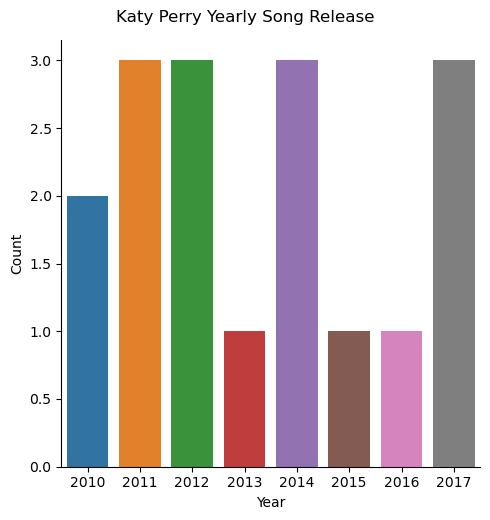

In [21]:
g = sns.catplot(x='year', y='count', data=kp, kind='bar')
g.fig.suptitle("Katy Perry Yearly Song Release", y=1.03)
g.set(xlabel='Year', ylabel='Count')
plt.show()

Katy Perry appeared in the chart every year from 2010 to 2017 at least with one song!

Let's check, how popular her songs were

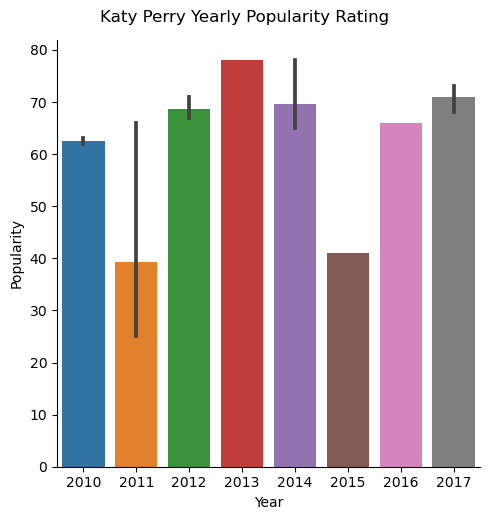

In [22]:
pop_kp = df[df['artist'] == 'Katy Perry'][['year', 'pop']]
g = sns.catplot(x='year', y='pop', data=pop_kp, kind='bar')
g.fig.suptitle("Katy Perry Yearly Popularity Rating", y=1.03)
g.set(xlabel='Year', ylabel='Popularity')
plt.show()

On this bar graph, respresenting popularity of Katy Perry songs, we can see that the biggest distrubution of the popularity rate was in 2011.<br> 3 songs ended up in the charts, and their popularity ranged from ~25 to ~66 with a mean of ~39.
In other years, when the singer released more than one hit, the spread of the popularity rate was not that big.

The exact numbers for 2011 popularity can be checked here:

In [23]:
print(
    "Katy Perry's songs of 2011 and their popularity score:", '\n',
    df[(df['artist'] == 'Katy Perry')
       & (df['year'] == 2011)][['title', 'pop']].reset_index(drop=True))
print('\n')
print(
    'The mean value of the popularity rate of Katy Perry in 2011 was',
    round(
        df[(df['artist'] == 'Katy Perry')
           & (df['year'] == 2011)]['pop'].mean(), 2))

Katy Perry's songs of 2011 and their popularity score: 
                           title  pop
0                          E.T.   66
1  Last Friday Night (T.G.I.F.)   27
2                      Firework   25


The mean value of the popularity rate of Katy Perry in 2011 was 39.33


The average popularity rate is pretty low, yet, she appeared with three songs in the chart that year<br> 
It seems that Katy Perry, despite appearing the most often in the chart, does not have quite high popularity ratings<br> Let's take a look at the mean popularity ratings of other artists and compare it to the occurence

### Popularity vs. occurence

Let's group our artists and calculate mean popularity rate

In [24]:
groupped_pop = df.groupby(
    'artist')['pop'].mean().to_frame().reset_index().sort_values(
        by='pop', ascending=False).reset_index(drop=True)
print(groupped_pop[0:6])
print('\n')
print("And this is where Katy Perry is:", '\n')
print(groupped_pop[groupped_pop['artist'] == 'Katy Perry'])

          artist        pop
0  Lewis Capaldi  96.000000
1          SHAED  92.000000
2          Lizzo  90.000000
3      Sam Smith  87.333333
4          Mabel  86.000000
5     Marshmello  86.000000


And this is where Katy Perry is: 

         artist        pop
126  Katy Perry  62.117647


126 place by popularity, despite appearing 17 times!

Let's check how many times the first three popularity leaders appeared in the chart

In [25]:
leads = groupped_pop['artist'][0:3].tolist()
df[df['artist'].isin(leads)]['artist'].value_counts()

Lizzo            2
Lewis Capaldi    1
SHAED            1
Name: artist, dtype: int64

Alright, artists who have the first three highest popularity ratings actually did not appear more than two times in the chart, but they did score acceptionally high with their hits.

Here's Katy Perry's stats:

In [26]:
df[df['artist'] == 'Katy Perry']['pop'].describe()

count    17.000000
mean     62.117647
std      15.818827
min      25.000000
25%      63.000000
50%      66.000000
75%      71.000000
max      78.000000
Name: pop, dtype: float64

Katty Perry, on the other hand, had varying popularity score from 25 to 78, but she consistently appeared in the chart almost every year with 1-3 songs.<br>
I call it success! :)

## Most popular year

Let's view which year had the highest popularity ratings

In [27]:
group_genre_pop = df.groupby('year')['pop'].mean().to_frame().reset_index()
max_pop = group_genre_pop['pop'].max()
print(
    "The year with highest popularity rating is:",
    group_genre_pop.loc[group_genre_pop['pop'] == max_pop,
                        'year'].to_frame()['year'].squeeze())

The year with highest popularity rating is: 2019


We can as well visualise it

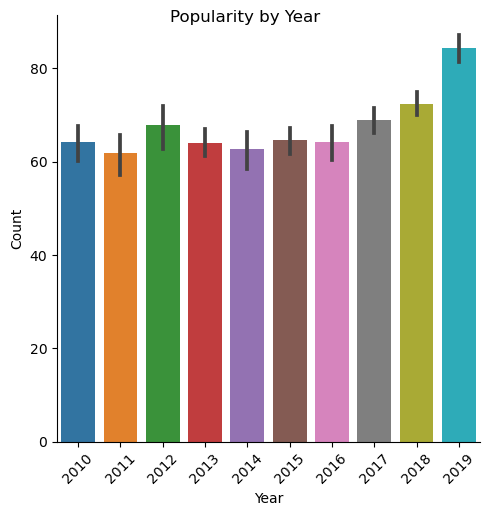

In [28]:
g = sns.catplot(x='year', y='pop', data=df, kind='bar')
g.fig.suptitle("Popularity by Year")
g.set(xlabel='Year', ylabel='Count')
plt.xticks(rotation=45)
plt.show()

2019 has the highest popularity score <br>
Let's see how many songs were released in 2019

In [29]:
print("In 2019,", df[df['year'] == 2019].shape[0], "songs were released")

In 2019, 31 songs were released


Can we compare it to other years?

In [30]:
song_count = df['year'].value_counts().to_frame().reset_index().rename(
    columns={
        "index": "year",
        "year": "count"
    }).sort_values('year')
song_count

,year,count
7,2010,51
6,2011,53
8,2012,35
2,2013,71
5,2014,58
0,2015,95
1,2016,80
3,2017,65
4,2018,64
9,2019,31


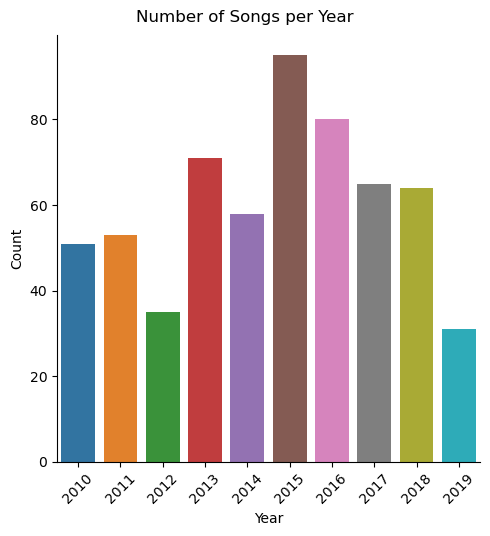

In [31]:
g = sns.catplot(x='year', y='count', data=song_count, kind='bar')
g.fig.suptitle("Number of Songs per Year", y=1.02)
g.set(xlabel='Year', ylabel='Count')
plt.xticks(rotation=45)
plt.show()

That's interesting, 2019 has only 31 records in our data set, but yet the highest popularity rating<br>
Let's take a closer look at our popularity rating values<br>
First, let's check their distribution

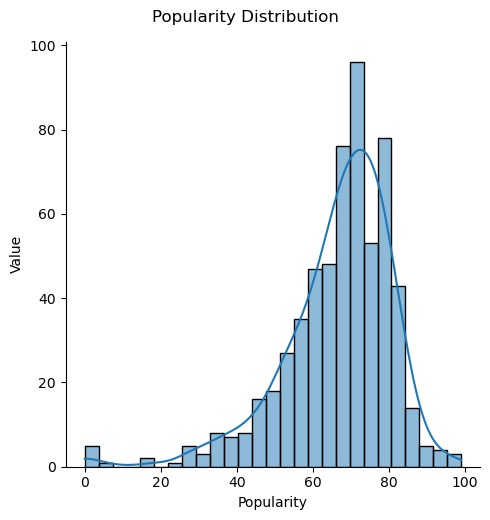

In [32]:
g = sns.displot(x='pop', data=df, kde=True)
g.fig.suptitle("Popularity Distribution", y=1.03)
g.set(xlabel='Popularity', ylabel='Value')
plt.show()

This is a normal distribution with a left skew<br>
Let's count the values of the popularity rating in 2019 and compare it with other years

In [33]:
pop_2019 = df[df['year'] == 2019]['pop'].value_counts().to_frame()
pop_2019 = pop_2019.reset_index().rename(columns={
    'index': 'rating',
    'pop': 'count'
}).sort_values(by='rating').reset_index(drop=True)
pop_2019

,rating,count
0,67,1
1,69,1
2,70,1
3,75,2
4,76,1
5,77,1
6,78,1
7,81,3
8,82,1
9,83,1


We can see a lot of higher ratings and not so many lower ones in 2019. Could that be one of the reasons for such high popularity with a low number of songs? Could there be outliers?

### Talk about outliers

Let's dive into some statistics and calculate the outliers threshold

In [34]:
first_q = df['pop'].quantile(.25)
print('The first quartile equals to', first_q)

third_q = df['pop'].quantile(.75)
print('The third quartile equals to', third_q)

inter_q = iqr(df['pop'])
print('The IQR equals to', inter_q)

upper_outlier = third_q + (inter_q * 1.5)
print('The upper outlier threshold is', upper_outlier)

lower_outlier = first_q - (inter_q * 1.5)
print('The lower outlier threshold is', lower_outlier)

The first quartile equals to 60.0
The third quartile equals to 76.0
The IQR equals to 16.0
The upper outlier threshold is 100.0
The lower outlier threshold is 36.0


Let's look again at the descriptive statistic of the popularity rating

In [35]:
df['pop'].describe()

count    603.000000
mean      66.520730
std       14.517746
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: pop, dtype: float64

Since the upper outlier threshold is higher than the maximum value of the popularity rating, it is safe to conclude that there are no upper outliers

On the other hand, we may assume that there are some lower outliers<br>
To prove it, let's subset our data with the lower outlier threshold

In [36]:
df[df['pop'] < lower_outlier]['year'].value_counts().to_frame().reset_index(
).rename(columns={
    'index': 'year',
    'year': 'count'
}).sort_values(by='year')

,year,count
4,2010,2
0,2011,5
6,2012,1
5,2013,2
2,2014,3
3,2015,3
1,2016,5


Yes, there are lower outliers almost every year, which can drag the mean value of the population down

To visualize all these calculations and statistics, we can plot boxplots

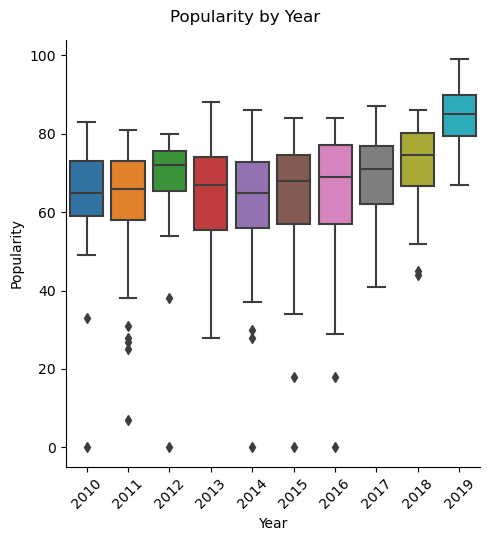

In [37]:
g = sns.catplot(x='year', y='pop', data=df, kind='box')
g.fig.suptitle("Popularity by Year", y=1.03)
g.set(xlabel='Year', ylabel='Popularity')
plt.xticks(rotation=45)
plt.show()

On this plot, we can see the proof of our assumptions.<br> 
The median of the 2019 is much higher and the IQR is smaller, compared to other years. That means, that in 2019 the tracks received predominantly higher ratings. Years before 2019 have a great number of lower outliers, which drag the mean value down

#### Weird ratings

It is also interesting that there are five zero values, let's explore that

In [38]:
df[df['pop'] == 0]

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
50,Hello,Martin Solveig,big room,2010,128,98,67,-3,10,45,191,1,3,0
138,Blow Me (One Last Kiss),P!nk,dance pop,2012,114,92,60,-3,25,75,256,0,4,0
267,Not a Bad Thing,Justin Timberlake,dance pop,2014,86,73,59,-6,38,46,266,27,6,0
362,L.A.LOVE (la la),Fergie,dance pop,2015,202,39,48,-8,26,27,193,2,9,0
442,Million Years Ago,Adele,british soul,2016,0,0,0,-60,0,0,227,0,0,0


Taking a look at these records, we may assume that most probably they were incorrectly filled out<br>
If there was a modeling implied, it would make sence to remove these records

#### P!nk and the role of zeros

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Pink_2019-07-27_Munich_%28cropped%29.jpg/800px-Pink_2019-07-27_Munich_%28cropped%29.jpg' width='200' align='left'>

To demonstrate the effect of mistaken zero values, I would like to show an example of my favourite artist P!nk

In [39]:
df[df['artist'] == 'P!nk'][['title', 'pop']].sort_values(by='pop')

,title,pop
138,Blow Me (One Last Kiss),0
98,Raise Your Glass,38
556,What About Us,66
399,Just Like Fire (From the Original Motion Pictu...,71
115,Try,74
142,Just Give Me a Reason (feat. Nate Ruess),81


P!nk appered 6 times in the chart, her mean popularity will be the following:

In [40]:
df[df['artist'] == 'P!nk']['pop'].mean()

55.0

We can as well calculate the mean manually and eliminate the 0 value:

In [41]:
sum(df[df['artist'] == 'P!nk']['pop'].tolist()) / (
    len(df[df['artist'] == 'P!nk']['pop']) - 1)

66.0

A completely different story.

In case of outliers, it is advisible to refer to median instead of mean <br>
As we can see below, this value is very close to the actual average

In [42]:
df[df['artist'] == 'P!nk']['pop'].median()

68.5

### Over 80

Let's choose a threshold of 80 for the popularity and see the count of ratings higher than that among the years.

In [43]:
above_80 = df.loc[df['pop'] > 80,
                  'year'].value_counts().to_frame().reset_index().rename(
                      columns={
                          'index': 'year',
                          'year': 'count'
                      }).sort_values(by='year').reset_index(drop=True)
above_80

,year,count
0,2010,2
1,2011,1
2,2013,4
3,2014,2
4,2015,8
5,2016,5
6,2017,8
7,2018,16
8,2019,23


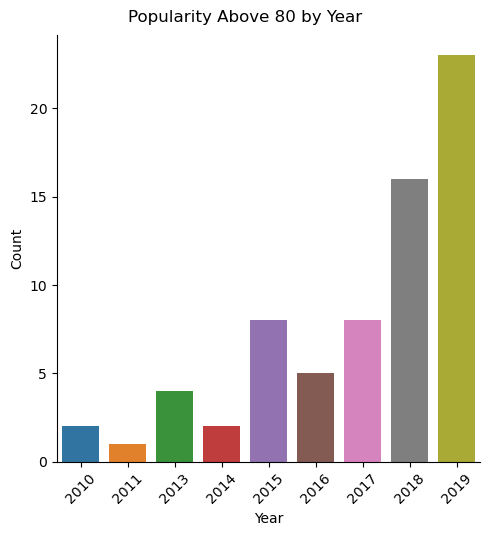

In [44]:
g = sns.catplot(x='year', y='count', data=above_80, kind='bar')
g.fig.suptitle("Popularity Above 80 by Year", y=1.02)
g.set(xlabel='Year', ylabel='Count')
plt.xticks(rotation=45)
plt.show()

### Conclusion

* The amount of tracks, that received a rating of more than 80 is way higher in 2019<br>
* Years 2010-2018 have less high score ratings and many lower outliers, including songs with 0 rating <br>
That is why, despite the low number of total songs, 2019 still has such a high popularity score

## Trends

Let's check out some trends throughout the years

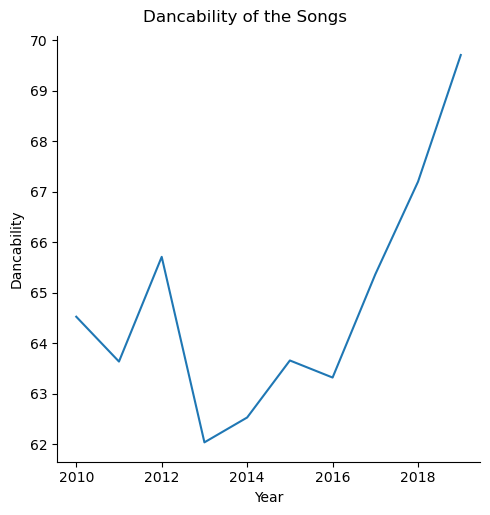

In [45]:
g = sns.relplot(x='year', y='dnce', data=df, kind='line', ci=None)
g.fig.suptitle("Dancability of the Songs", y=1.02)
g.set(xlabel='Year', ylabel='Dancability')
plt.show()

After 2016, songs dancibility is incrasing

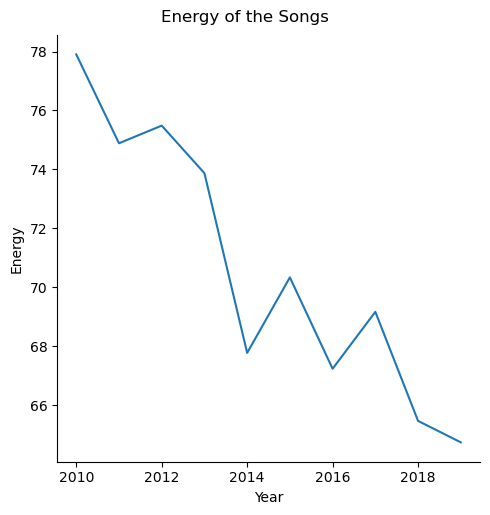

In [46]:
g = sns.relplot(x='year', y='nrgy', data=df, kind='line', ci=None)
g.fig.suptitle("Energy of the Songs", y=1.02)
g.set(xlabel='Year', ylabel='Energy')
plt.show()

The energy of the songs, on the other hand, is visibly decreasing

## Genres

Let's take a look at the most frequent genres

In [47]:
genres = df['top genre'].value_counts().to_frame().reset_index().rename(
    columns={
        'index': 'genre',
        'top genre': 'count'
    })
print('there are', genres.shape[0], 'unique genres')
print('Here are the top 10:')
print('\n')
print(genres.head(10))

there are 50 unique genres
Here are the top 10:


                       genre  count
0                  dance pop    327
1                        pop     60
2               canadian pop     34
3              barbadian pop     15
4                   boy band     15
5                 electropop     13
6               british soul     11
7                   big room     10
8  canadian contemporary r&b      9
9                 neo mellow      9


The most frequent genre is dance pop. But how about the popularity?<br>
Does appearing more often in the chart has an ifluence on popularity rate?

In [48]:
top_genre = df.groupby(
    'top genre')['pop'].mean().to_frame().reset_index().sort_values(
        by='pop', ascending=False).reset_index(drop=True)
top_genre.head(10)

,top genre,pop
0,escape room,90.000000
1,brostep,86.000000
2,alternative r&b,84.000000
3,irish singer-songwriter,81.000000
4,danish pop,80.000000
5,celtic rock,80.000000
6,electronic trap,79.500000
7,edm,78.200000
8,canadian contemporary r&b,77.666667
9,electropop,77.461538


In [49]:
print("And this is where the dance pop is is:", '\n')
print(top_genre[top_genre['top genre'] == 'dance pop'])

And this is where the dance pop is is: 

    top genre        pop
30  dance pop  64.363914


Just like with the artist, the most frequent genre dance pop is only on the 30th position in terms of popularity rate

Let's check the occurence of the highest popularity genres

In [50]:
leads_g = top_genre['top genre'][0:6].tolist()
df[df['top genre'].isin(leads_g)]['top genre'].value_counts()

brostep                    2
escape room                2
celtic rock                1
irish singer-songwriter    1
danish pop                 1
alternative r&b            1
Name: top genre, dtype: int64

The 5 highest popularity genres genres, just like artists, do not appear more than twice in our chart

## Conclusion

We observe the same trend both with the artists and the genres. Even though dance pop appeared most often in the chart, the songs of this genre seem to have received lower popularity ratings on the average <br>
Songs of other genres had a skyrocketing popularity rate, at the same time having a smaller occurence rate<br>

We may conclude that new singers, performing in new genres, enter the music industry with a great success. These are singers like Lizzo, Lewis Capaldi and SHAED. <br>

Other lead singers, such as Lady Gaga, Katy Perry and Justin Bieber, who have been in the industry for years, still keep their popularity positions with their loyal army of fans, consistently releasing new tracks, but cede to others in popularity ratings.